In [ ]:
!pip install pandas numpy matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/athlete_events.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.describe())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [ ]:
df['Medal'].fillna('None', inplace=True)
df.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)


<ipython-input-20-2f405b35e897>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('None', inplace=True)


In [ ]:
print(df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [ ]:
df['Team'] = df['Team'].str.upper()  # Replace 'Country' with the correct name


In [ ]:
df['Gold'] = (df['Medal'] == 'Gold').astype(int)
df['Silver'] = (df['Medal'] == 'Silver').astype(int)
df['Bronze'] = (df['Medal'] == 'Bronze').astype(int)


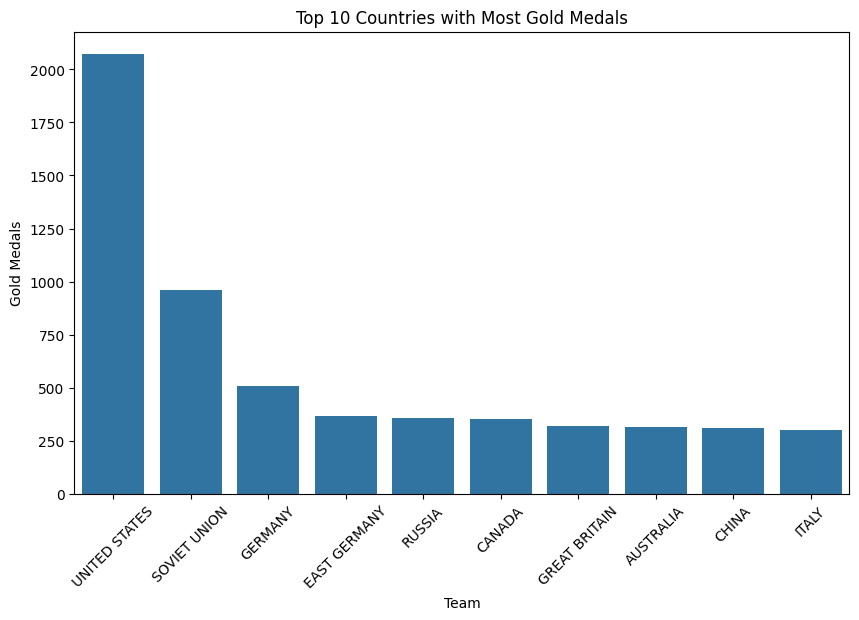

In [ ]:
gold_medals = df[df['Medal'] == 'Gold']
top_countries = gold_medals['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Gold Medals')
plt.xlabel('Team')
plt.ylabel('Gold Medals')
plt.xticks(rotation=45)
plt.show()


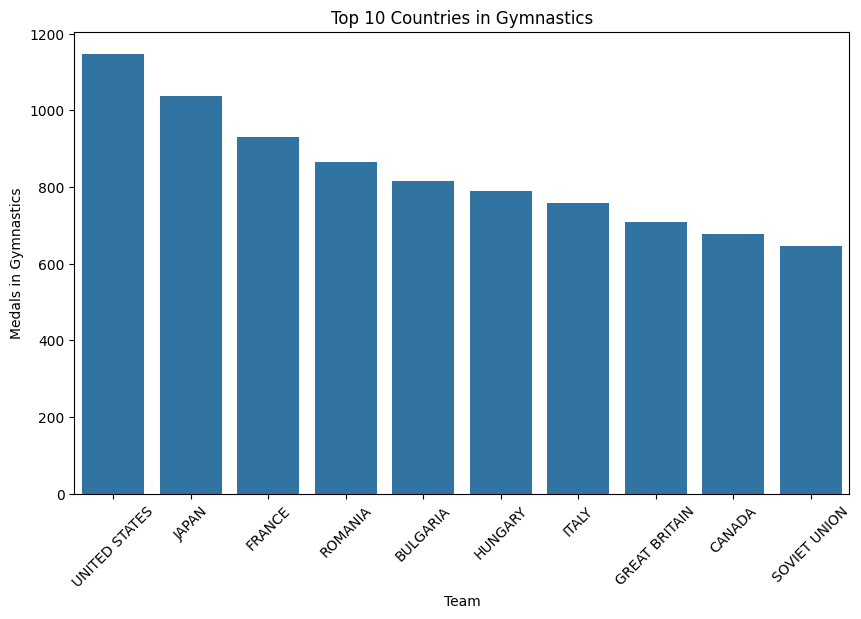

In [ ]:
gymnastics = df[df['Sport'] == 'Gymnastics']
top_gym_countries = gymnastics['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_gym_countries.index, y=top_gym_countries.values)
plt.title('Top 10 Countries in Gymnastics')
plt.xlabel('Team')
plt.ylabel('Medals in Gymnastics')
plt.xticks(rotation=45)
plt.show()


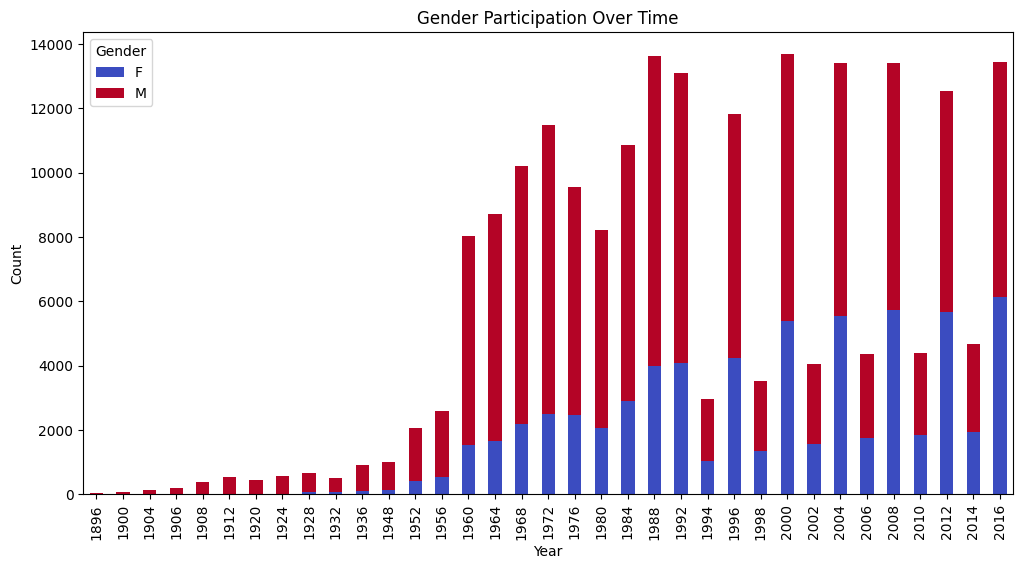

In [ ]:
gender_counts = df.groupby(['Year', 'Sex']).size().unstack()

gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Gender Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


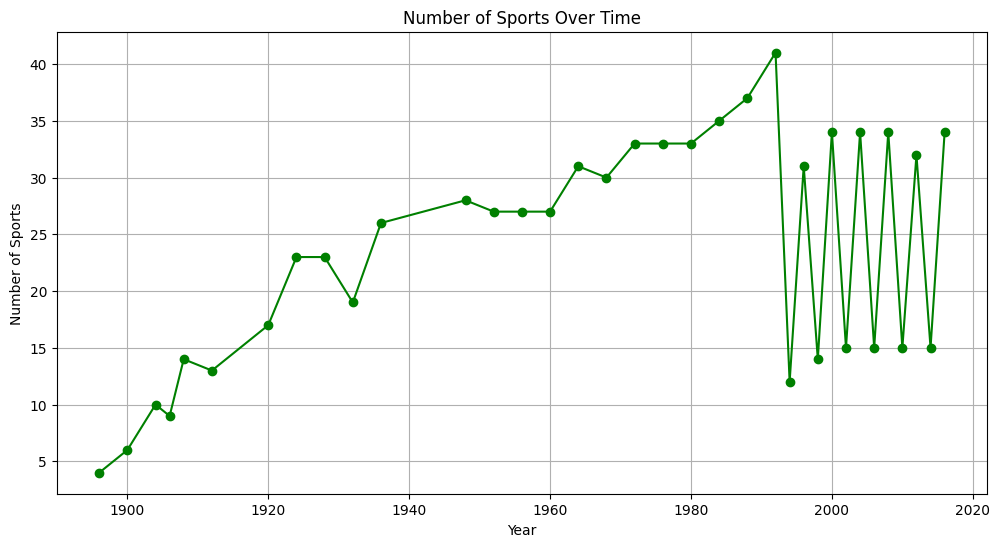

In [ ]:
sports_count = df.groupby('Year')['Sport'].nunique()

plt.figure(figsize=(12, 6))
sports_count.plot(marker='o', color='green')
plt.title('Number of Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.grid()
plt.show()


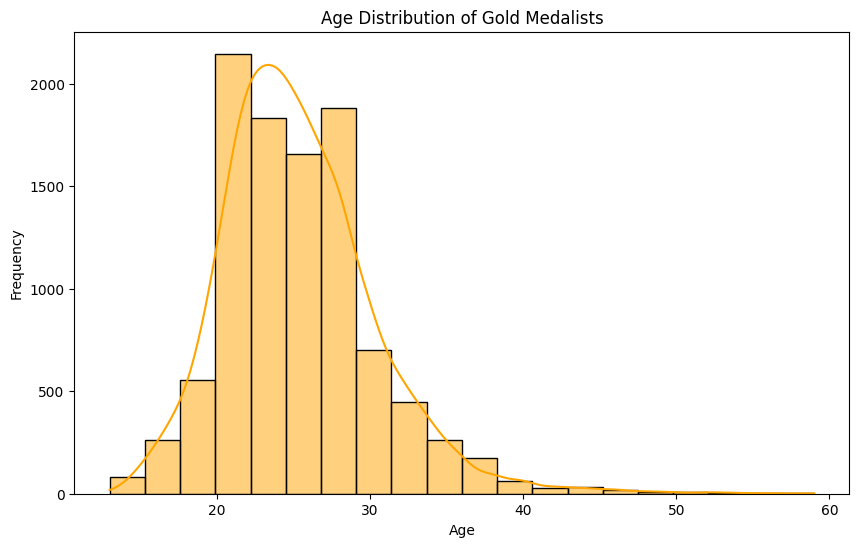

In [ ]:
gold_age = df[df['Medal'] == 'Gold']

plt.figure(figsize=(10, 6))
sns.histplot(gold_age['Age'], bins=20, kde=True, color='orange')
plt.title('Age Distribution of Gold Medalists')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


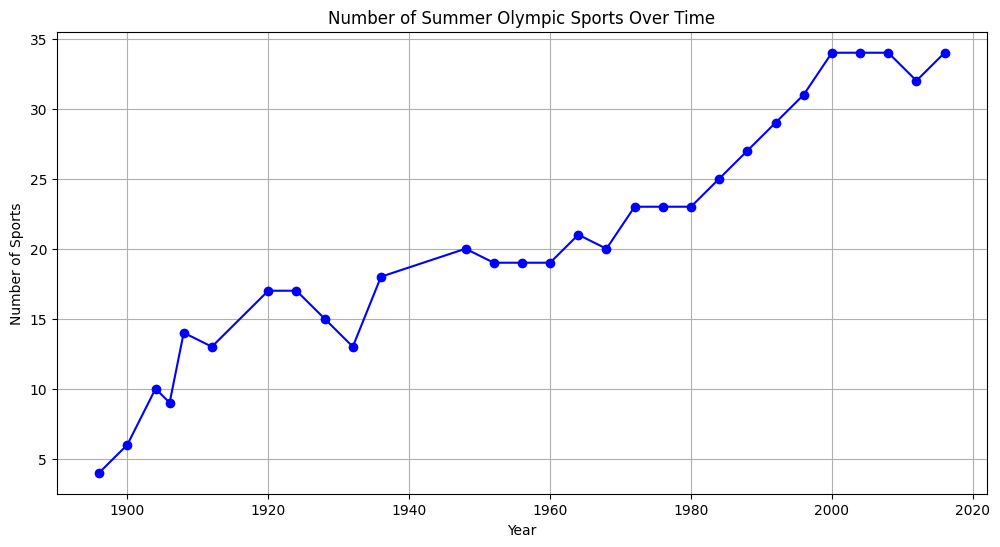

In [ ]:
summer_sports = df[df['Season'] == 'Summer'].groupby('Year')['Sport'].nunique()

plt.figure(figsize=(12, 6))
summer_sports.plot(marker='o', color='blue')
plt.title('Number of Summer Olympic Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.grid()
plt.show()


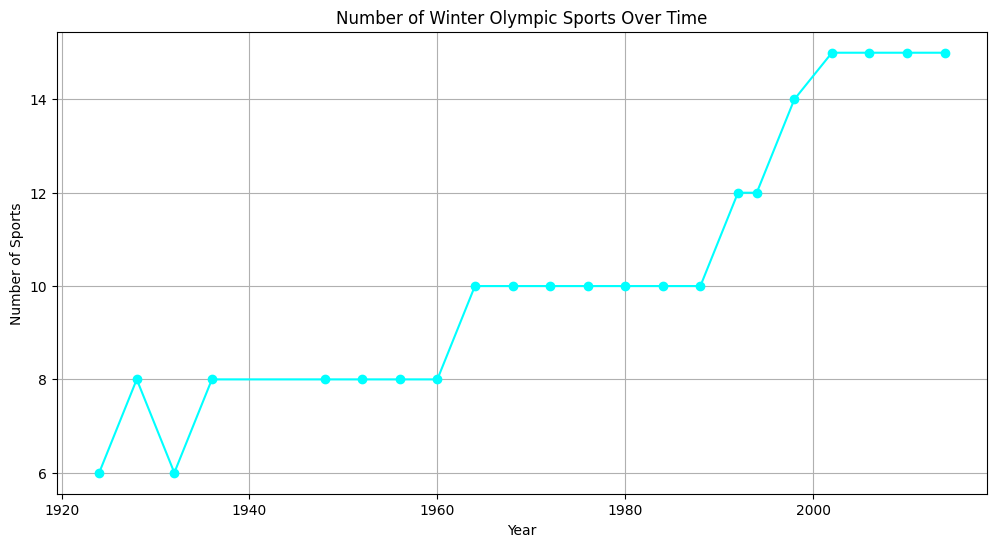

In [ ]:
winter_sports = df[df['Season'] == 'Winter'].groupby('Year')['Sport'].nunique()

plt.figure(figsize=(12, 6))
winter_sports.plot(marker='o', color='cyan')
plt.title('Number of Winter Olympic Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.grid()
plt.show()


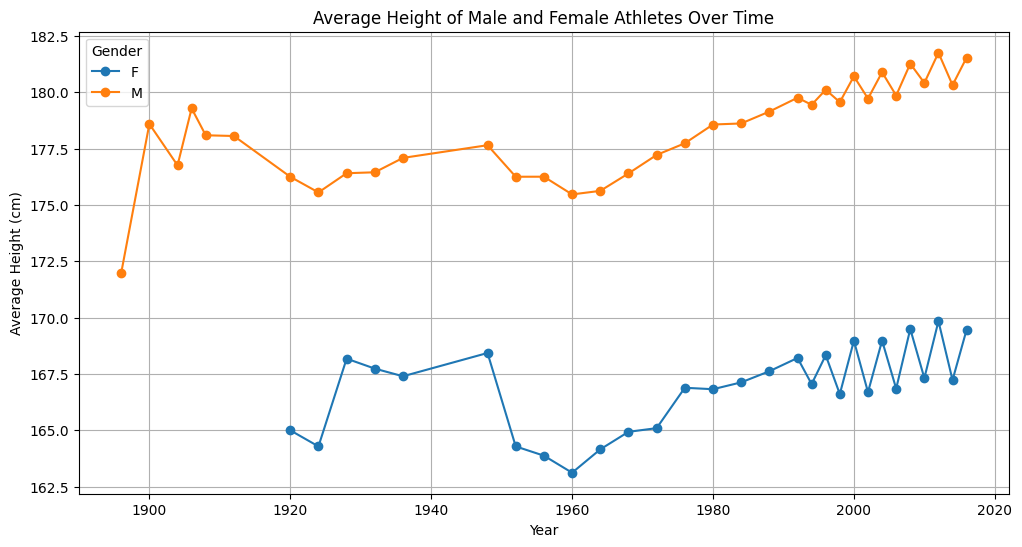

In [ ]:
avg_height = df.groupby(['Year', 'Sex'])['Height'].mean().unstack()

avg_height.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Height of Male and Female Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.legend(title='Gender')
plt.grid()
plt.show()


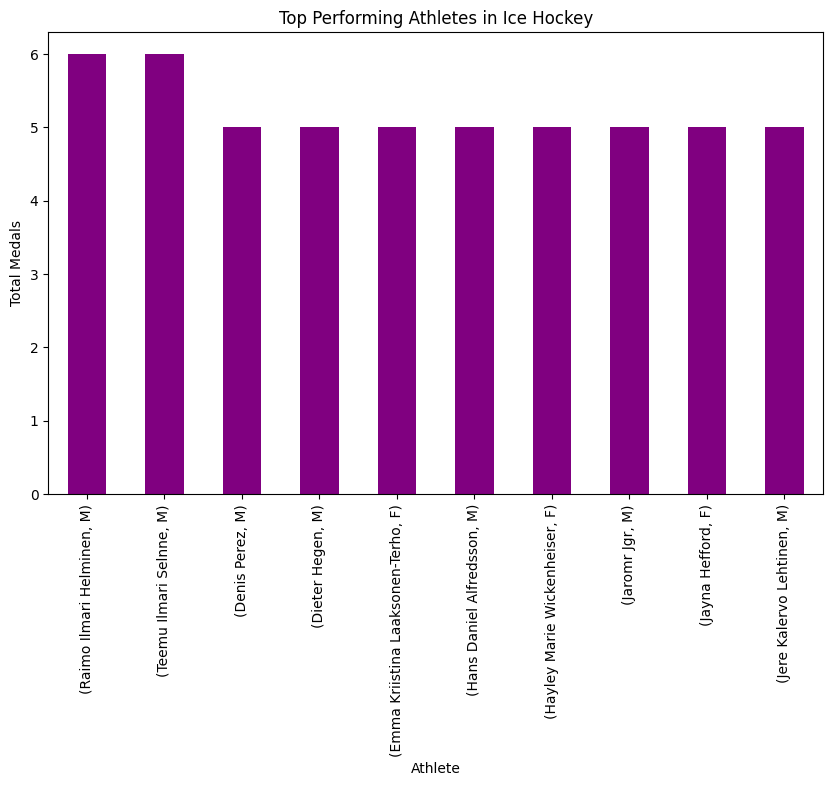

In [ ]:
ice_hockey = df[df['Sport'] == 'Ice Hockey']
top_athletes = ice_hockey.groupby(['Name', 'Sex'])['Medal'].count().nlargest(10)

top_athletes.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top Performing Athletes in Ice Hockey')
plt.xlabel('Athlete')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.show()


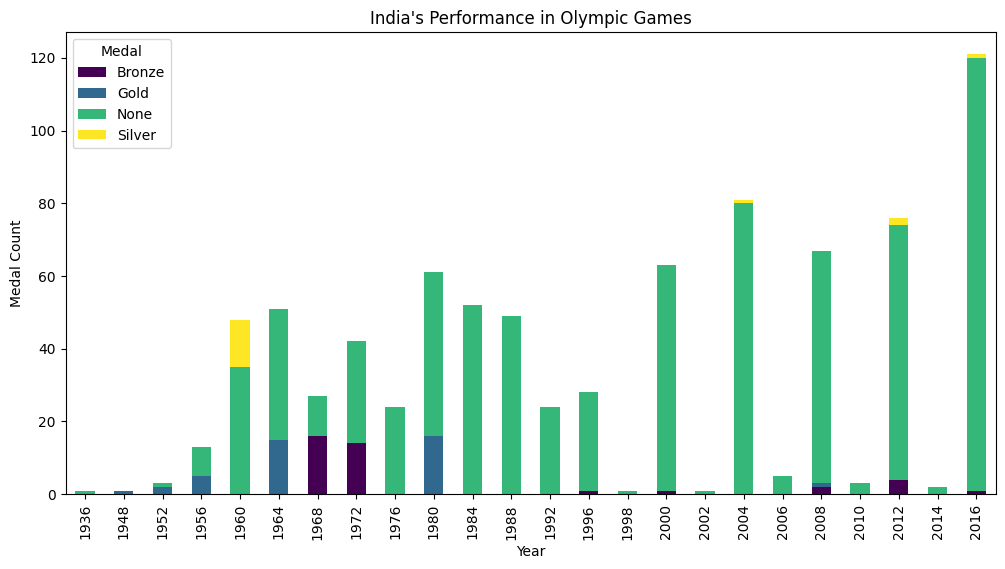

In [ ]:
india_data = df[df['NOC'] == 'IND']
india_medals = india_data.groupby('Year')['Medal'].value_counts().unstack(fill_value=0)

india_medals.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("India's Performance in Olympic Games")
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Medal')
plt.show()


In [ ]:
filtered_df = df[df['Medal'] != 'None']


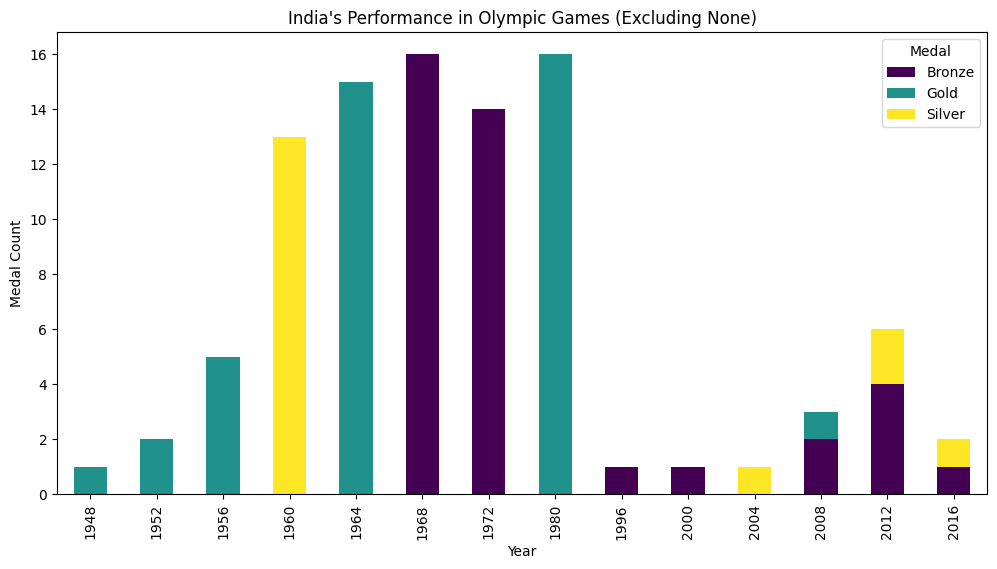

In [ ]:
india_data = df[df['NOC'] == 'IND']  # Filter for India
india_medals = india_data[india_data['Medal'] != 'None']  # Exclude 'None' medals
medal_counts = india_medals.groupby('Year')['Medal'].value_counts().unstack(fill_value=0)

# Plotting
medal_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("India's Performance in Olympic Games (Excluding None)")
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Medal')
plt.show()


In [ ]:
print(filtered_df['Medal'].unique())  # Should only show ['Gold', 'Silver', 'Bronze']
print(filtered_df.head())  # Inspect the first few rows of filtered data


['Bronze' 'Gold' 'Silver']
    ID                      Name Sex   Age  Height  Weight     Team  NOC  \
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0  FINLAND  FIN   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  FINLAND  FIN   
42  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  FINLAND  FIN   
44  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  FINLAND  FIN   
48  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  FINLAND  FIN   

          Games  Year  Season    City       Sport  \
40  2014 Winter  2014  Winter   Sochi  Ice Hockey   
41  1948 Summer  1948  Summer  London  Gymnastics   
42  1948 Summer  1948  Summer  London  Gymnastics   
44  1948 Summer  1948  Summer  London  Gymnastics   
48  1948 Summer  1948  Summer  London  Gymnastics   

                                     Event   Medal  Gold  Silver  Bronze  
40             Ice Hockey Men's Ice Hockey  Bronze     0       0       1  
41  Gymnastics Men's Individual All-Around  Bro

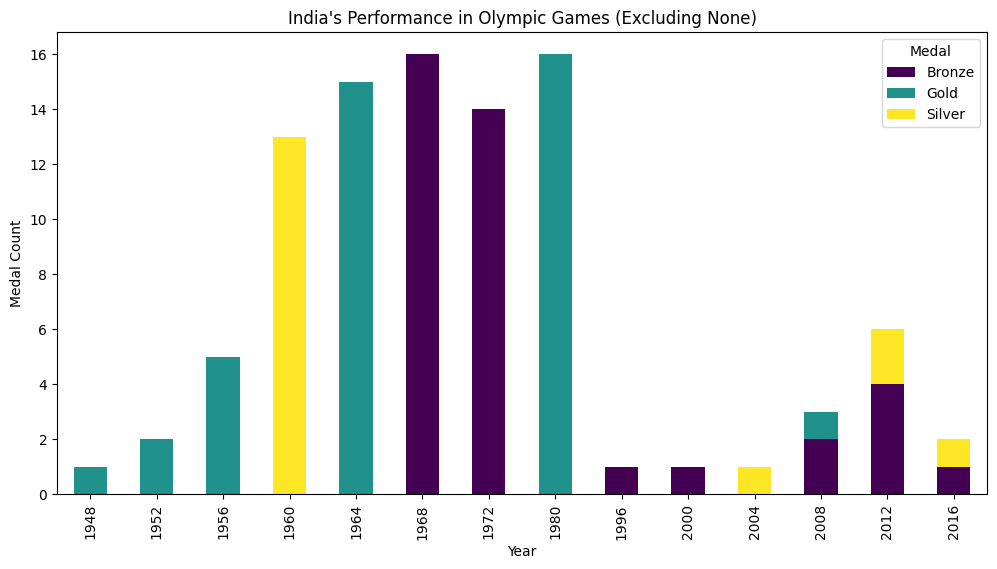

In [ ]:
india_data = df[df['NOC'] == 'IND']  # Filter for India
india_medals = india_data[india_data['Medal'] != 'None']  # Exclude 'None' medals
medal_counts = india_medals.groupby('Year')['Medal'].value_counts().unstack(fill_value=0)

# Plotting
medal_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("India's Performance in Olympic Games (Excluding None)")
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Medal')
plt.show()
